# Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Open, convert, and save image as bmp

In [2]:
#filename_to_convert = 'mini_smiley.jpg'
#img_to_convert = cv2.imread(filename_to_convert)
#cv2.imwrite('mini_smiley.bmp', img_to_convert)

# Load Image

image shape: (100, 100, 3)


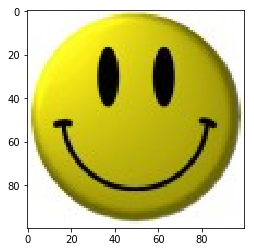

In [3]:
filename = 'mini_smiley.jpg'
img = cv2.imread(filename)
print('image shape: ' + str(img.shape))
imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Convert to Grayscale

gray image shape: (100, 100)


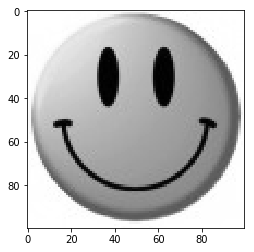

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('gray image shape: ' + str(img_gray.shape))
imgplot = plt.imshow(img_gray, cmap='gray')

# Apply Harris Corner Function

In [5]:
dst = cv2.cornerHarris(img_gray,2,3,0.04)
print('Shape of dst: ' + str(dst.shape))
print('Number of non-zero values: ' + str(np.count_nonzero(dst)))

Shape of dst: (100, 100)
Number of non-zero values: 9607


# Dilate to remove noise

In [6]:
dst_dilated = cv2.dilate(dst,None)
print('Shape of dst_dilated: ' + str(dst.shape))
print('Number of non-zero values for dst_dilated: ' + str(np.count_nonzero(dst)))

Shape of dst_dilated: (100, 100)
Number of non-zero values for dst_dilated: 9607


# Non-maximum Suppression - Threshold

Number of corners:134


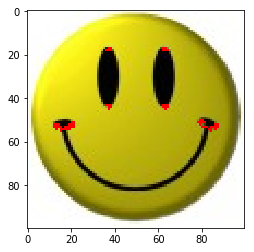

In [12]:
# Threshold
corners = np.argwhere(dst>0.01*dst.max())
print('Number of corners:' + str(corners.size) )

# Show image:
img_harris1 = cv2.imread(filename)
img_harris1[dst>0.01*dst.max()]=[0,0,255]
imgplot = plt.imshow(cv2.cvtColor(img_harris1, cv2.COLOR_BGR2RGB))

# Non-maximum Suppression - Remove Immediate Neighbors

Shape of filtered coords array: (8, 2)


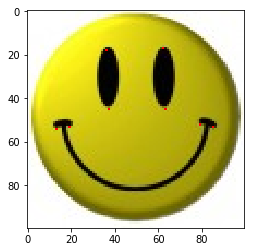

In [13]:
min_distance = 5
candidate_values = [dst[c[0]][c[1]] for c in corners]

#sort candidates
index = np.argsort(candidate_values)

#store allowed point locations in array
allowed_locations = np.zeros(dst.shape)
allowed_locations[min_distance:-min_distance,min_distance:-min_distance] = 1

#select the best points taking min_distance into account
filtered_coords = []
for i in index:
    if allowed_locations[corners[i][0]][corners[i][1]] == 1:
        filtered_coords.append(corners[i])
        allowed_locations[(corners[i][0]-min_distance):(corners[i][0]+min_distance),
            (corners[i][1]-min_distance):(corners[i][1]+min_distance)] = 0
print('Shape of filtered coords array: ' + str(np.array(filtered_coords).shape))

# Show image:
img_harris2 = cv2.imread(filename)
for c in filtered_coords:
    img_harris2[c[0]][c[1]]=[0,0,255]
imgplot = plt.imshow(cv2.cvtColor(img_harris2, cv2.COLOR_BGR2RGB))